In [25]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

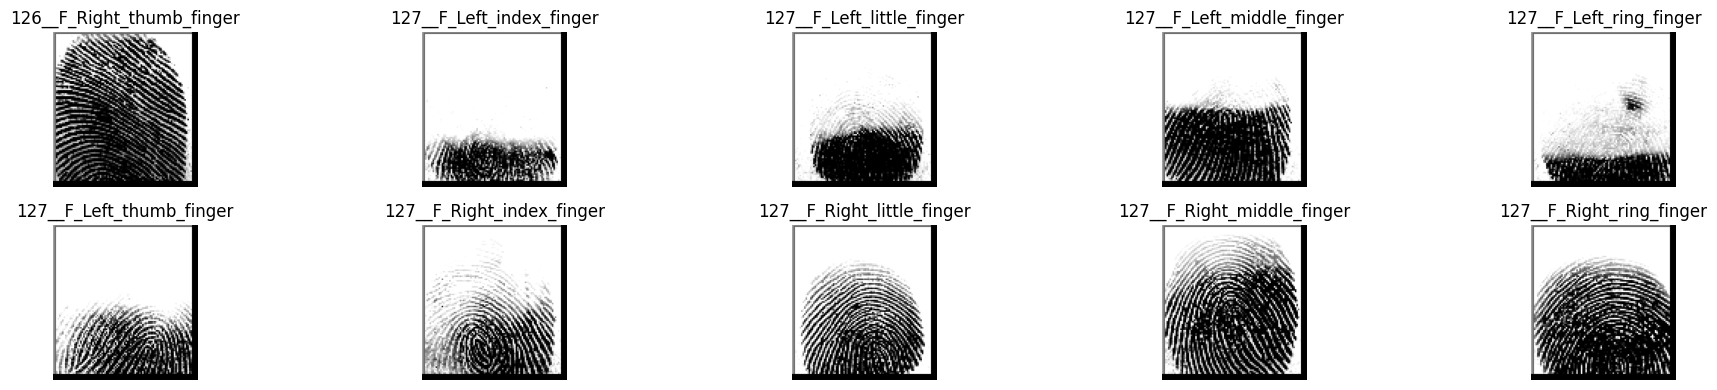

In [30]:
storage=[]
plt.figure(figsize=(20, 4))
i=1
for  file in os.listdir("SOCOFing\\Real")[289:299]:
    aaa = cv2.imread("SOCOFing\\Real\\"+ file)
    filee=file[:-4]
    a = cv2.cvtColor(aaa, cv2.COLOR_BGR2GRAY)
    storage.append(a)
    
    plt.subplot(2, 5, i)  
    i+=1
    plt.imshow(a, cmap="gray")
    plt.title(filee) 
    plt.axis("off")

plt.tight_layout()
plt.show(block=True)

In [26]:
def remove_white_background_threshold(img):
    # Chuyển ảnh về dạng grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Áp dụng thresholding
    img=255-img
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)[1]

    # Tìm contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lấy contour lớn nhất (giả sử vân tay là đối tượng lớn nhất)
    cnt = max(contours, key=cv2.contourArea)

    # Tìm bounding box của contour
    x, y, w, h = cv2.boundingRect(cnt)

    # Cắt ảnh theo bounding box
    cropped_img = img[y:y+h, x:x+w]

    return cropped_img

In [33]:
def remove_white_background(img):
    # Chuyển ảnh về dạng grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Tìm các pixel không phải màu trắng (ví dụ: giá trị pixel khác 255)
    #non_white_pixels = np.where(img != 255)
    height, width = img.shape

    # Tạo một danh sách rỗng để lưu trữ tọa độ các pixel trắng
    non_white_pixels = []

    # Duyệt qua từng pixel
    for y in range(height):
        for x in range(width):
            if img[y, x] != 255:
                non_white_pixels.append((x, y))
    print(non_white_pixels)
    # Tìm bounding box nhỏ nhất bao quanh các pixel không phải màu trắng
    x_min, y_min = np.min(non_white_pixels, axis=1)
    x_max, y_max = np.max(non_white_pixels, axis=1)
    print(x_min," ", x_max," ", y_min," ", y_max)
    # Cắt ảnh theo bounding box
    cropped_img = img[y_min:y_max, x_min:x_max]

    return cropped_img

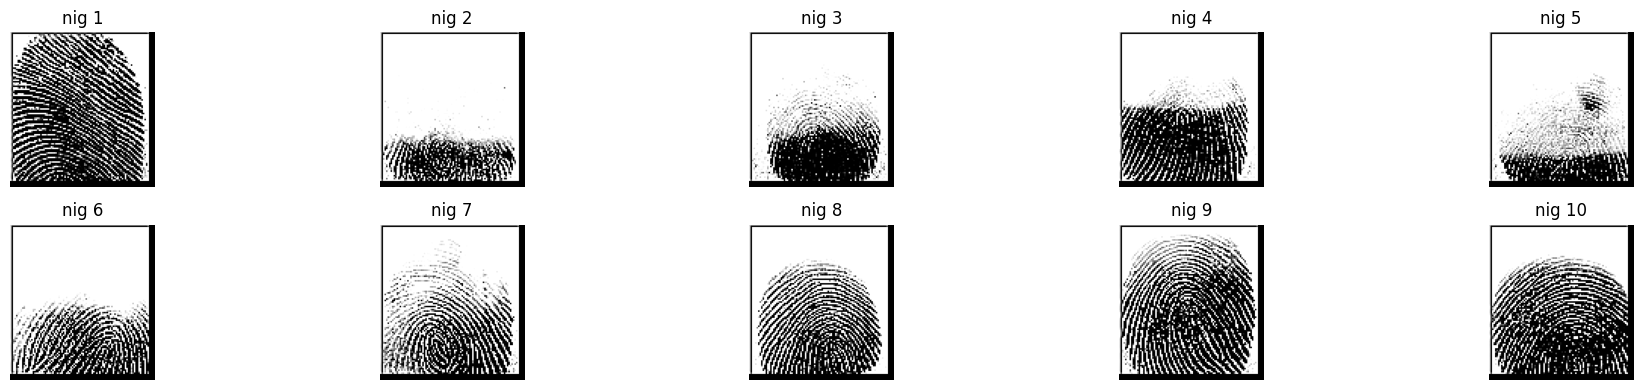

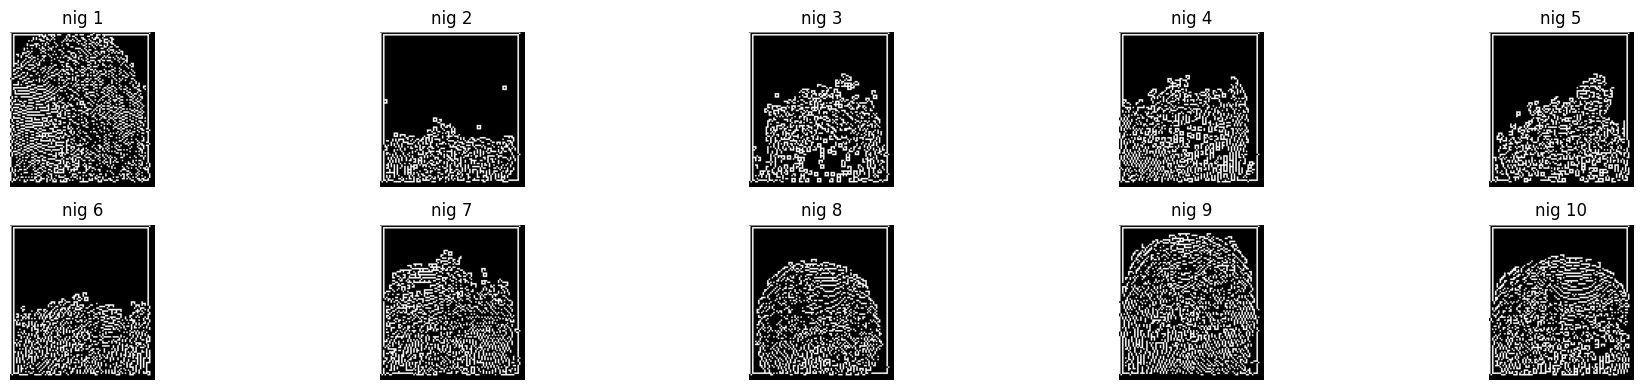

In [32]:
def unsharp_mask(img, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Applies unsharp masking to an image.

    Args:
        img: Input image.
        kernel_size: Kernel size for Gaussian blur.
        sigma: Standard deviation for Gaussian blur.
        amount: Strength of the unsharp masking effect.
        threshold: Threshold for applying the unsharp masking effect.

    Returns:
        Unsharp masked image.
    """

    blurred = cv2.GaussianBlur(img, kernel_size, sigma)
    sharpened = float(amount + 1) * img - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)

    if threshold > 0:
        mask = np.abs(img - blurred) >= threshold
        sharpened = np.where(mask, sharpened, img)

    return sharpened

plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = unsharp_mask(file)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = cv2.Canny(file, 50, 200)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

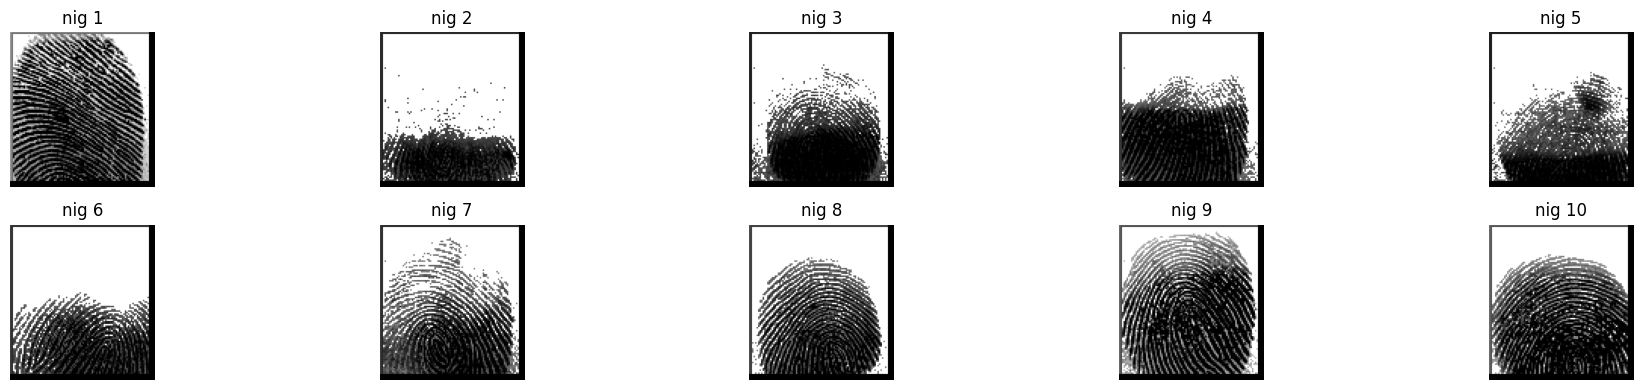

In [27]:
#tăng cường ảnh
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = cv2.equalizeHist(file)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

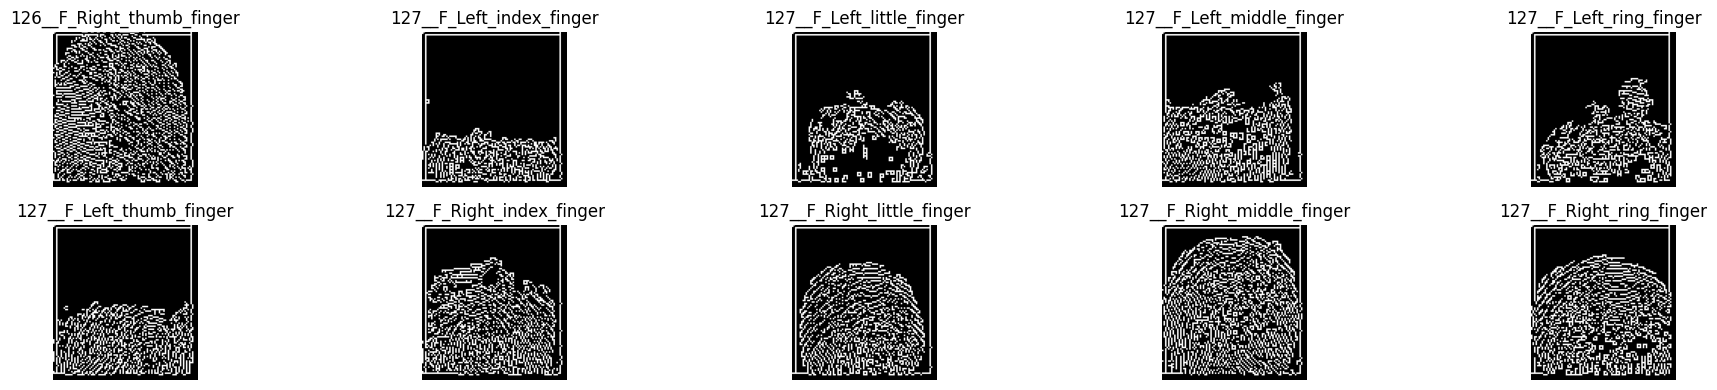

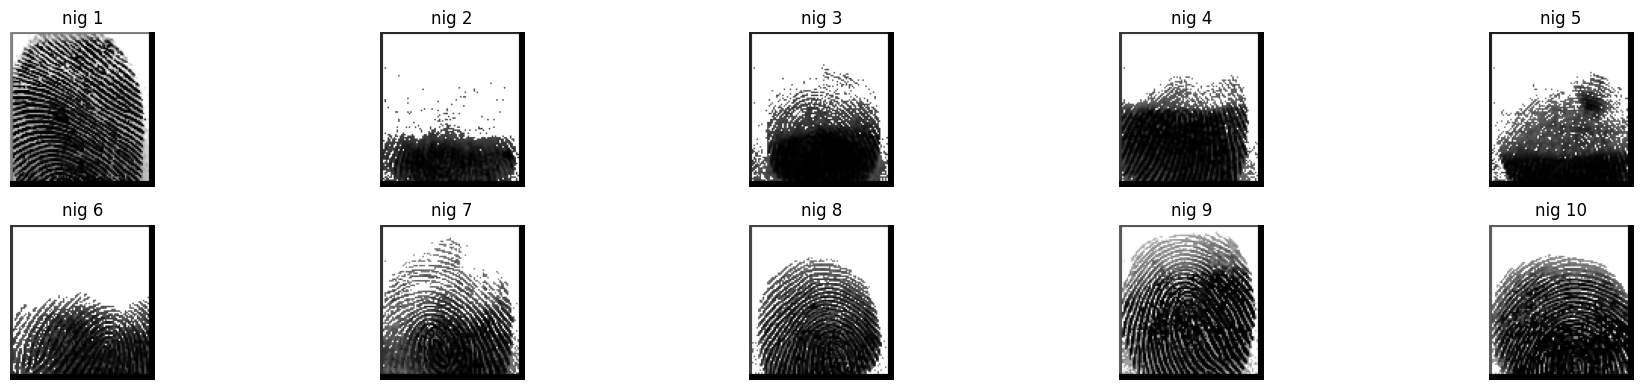

In [28]:
#làm mờ ảnh để khử nhiễu
plt.figure(figsize=(20, 4))
i=1
for  file in os.listdir("SOCOFing\\Real")[289:299]:
    aaa = cv2.imread("SOCOFing\\Real\\"+ file)
    filee=file[:-4]
    a = cv2.cvtColor(aaa, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(a, 50, 200)

    
    plt.subplot(2, 5, i)  
    i+=1
    #wtf = remove_white_background(a)
    plt.imshow(canny , cmap="gray")
    plt.title(filee) 
    plt.axis("off")

plt.tight_layout()
plt.show(block=True)
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = cv2.bilateralFilter(file, 3, 40, 40)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)

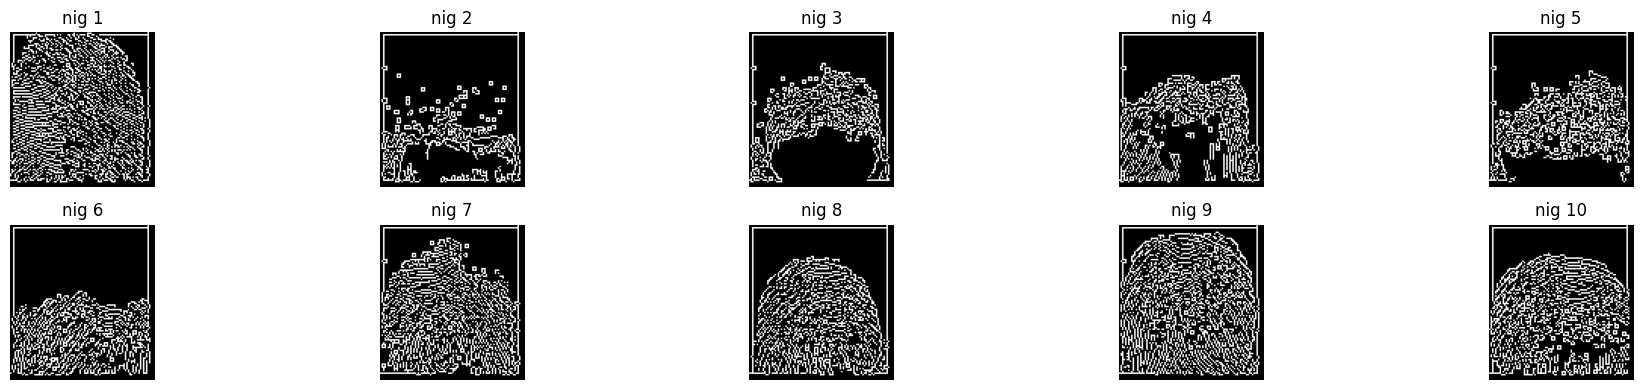

In [29]:
#tăng cường cạnh bằng canny detector
    
plt.figure(figsize=(20, 4))
i=1
for  file in storage:
    
    storage[i-1] = cv2.Canny(file, 50, 200)

    
    plt.subplot(2, 5, i)  
    
    plt.imshow(storage[i-1] , cmap="gray")
    plt.title(f"nig {i}") 
    plt.axis("off")
    i+=1

plt.tight_layout()
plt.show(block=True)